In [31]:
import pandas as pd # spracovanie dát, CSV subor I/O
import numpy as np # lineara algebra
from sklearn.preprocessing import StandardScaler # použtie pre škálovanie údajov
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# načitanie suboru train.csv
df_train = pd.read_csv('train.csv', index_col=0)

In [7]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
Id                                    ...                             
1          Lvl    AllPub    Inside    ...            0    NaN   NaN   
2          Lvl    AllPub       FR2    ...            0    NaN   NaN   
3          Lvl    AllPub    Inside    ...            0    NaN   NaN   
4          Lvl    AllPub    Corner    ...            0    NaN   NaN   
5          Lvl    AllPub       FR2    ...            0    NaN   NaN   

   MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                                         
1          NaN       0      2    2008        WD         Normal     208500  
2          NaN       0      5    2007        WD         Normal     181500  
3          NaN       0      9    2008        WD         Normal     223500  
4          NaN       0      2    2006        WD        Abnorml     140000  
5          NaN       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [33]:
# zhrnutie popisných štatistík
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

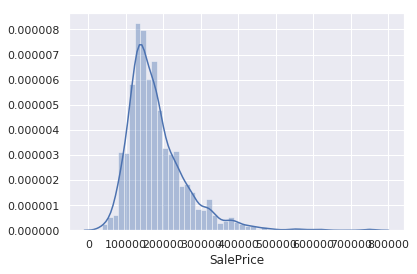

In [37]:
#histogram
sns.distplot(df_train['SalePrice']);

In [36]:
# skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


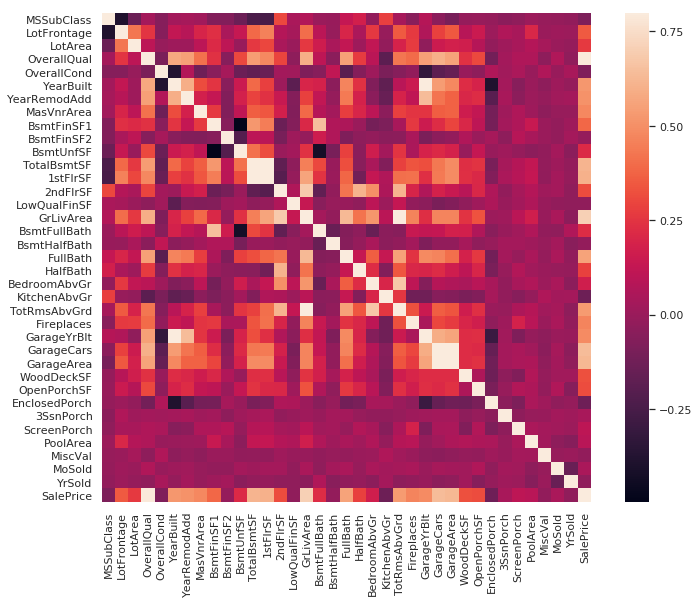

In [38]:
# korelačná matica
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

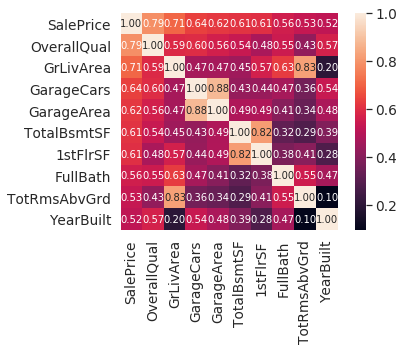

In [39]:
#saleprice korelačná matica
k = 10 #počet premenných pre heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

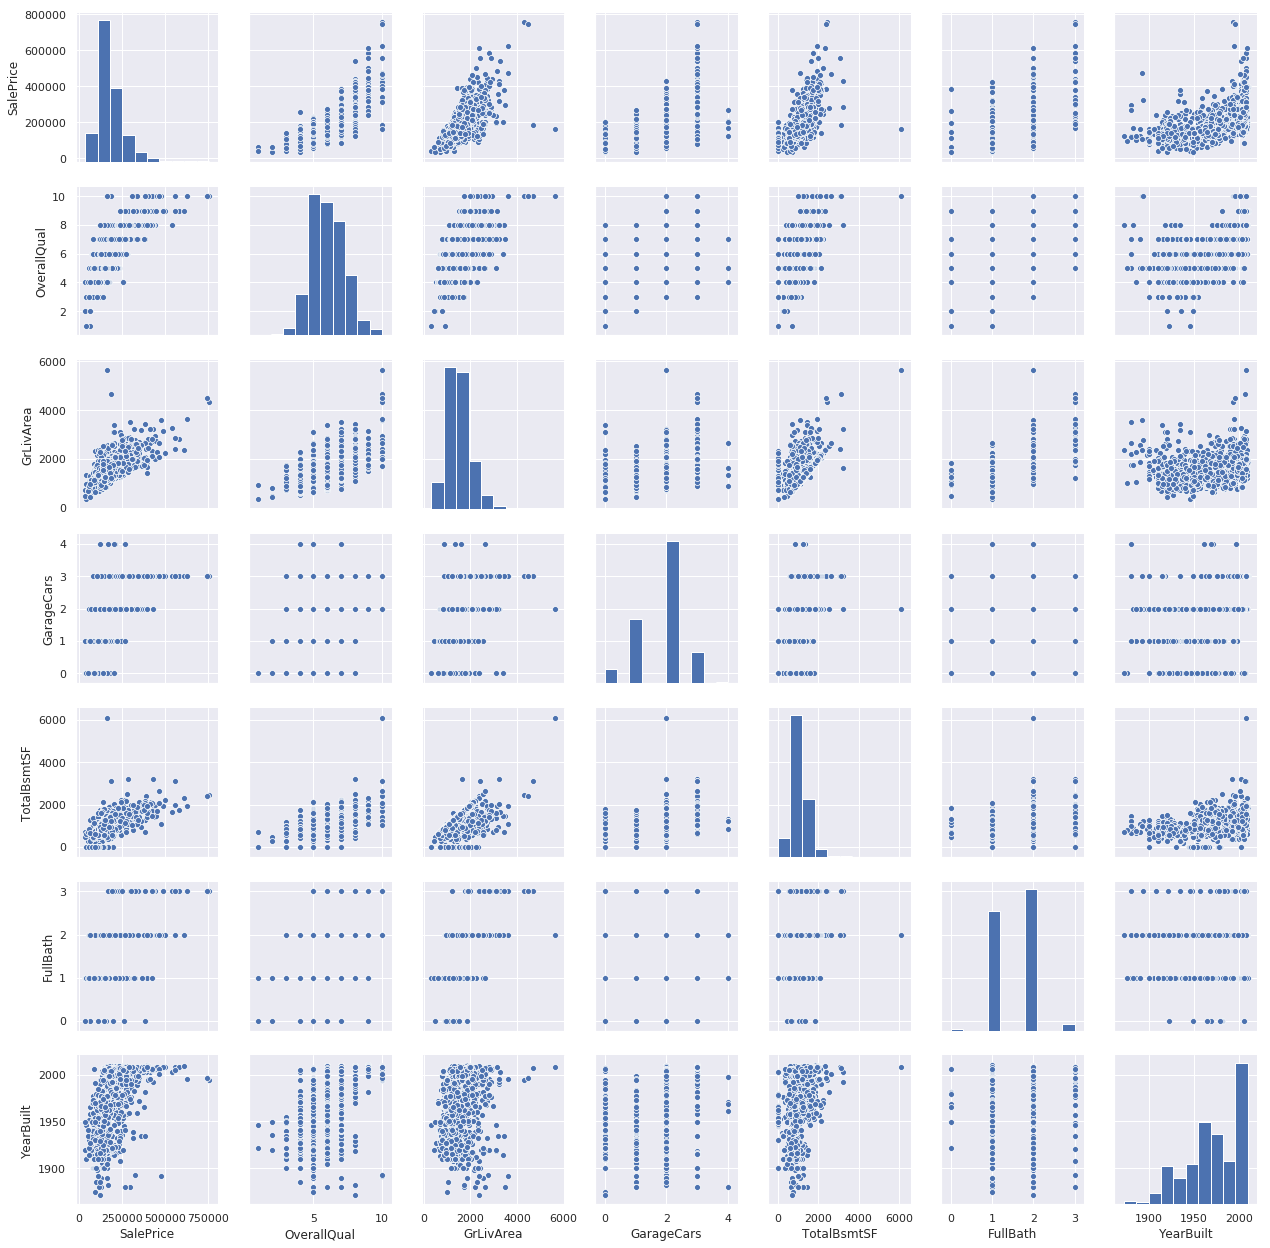

In [41]:
# bodový diagram
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

In [42]:
# chýbajúce údaje
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageType       81  0.055479
GarageCond       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
GarageYrBlt      81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
RoofMatl          0  0.000000

In [17]:
df_train = df_train.fillna(df_train.mean())

In [43]:
# štandardizáciu údajov
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


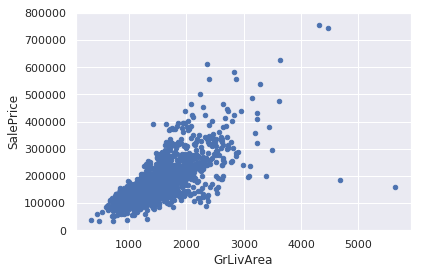

In [44]:
# bivariate analýza saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [20]:
df_train = pd.read_csv('train.csv')

In [46]:
cols = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']
df_train = df_train[cols]
# vytvorenie fiktívnych hodnôt
df_train = pd.get_dummies(df_train)
# naplnenie NA stredom stĺpca:
df_train = df_train.fillna(df_train.mean())
# pred použitím NN vždy štandardna zmena údajov
scale = StandardScaler()
X_train = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']]
X_train = scale.fit_transform(X_train)
# Y je len 'SalePrice' stlpec
y = df_train['SalePrice'].values
seed = 7
np.random.seed(seed)
# rozdelenie na 67% pre trenovacie data 33% pre testovacie data
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.33, random_state=seed)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [47]:
def create_model():
    # vytvorenie modelu
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    # kompilacia modelu
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [23]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=32)

Train on 978 samples, validate on 482 samples
Epoch 1/150
978/978 [==============================] - 4s 4ms/step - loss: 38028804749.3497 - mean_absolute_error: 179315.7527 - val_loss: 41089220004.6473 - val_mean_absolute_error: 184177.8990
Epoch 2/150
978/978 [==============================] - 0s 73us/step - loss: 38028374660.9734 - mean_absolute_error: 179314.5521 - val_loss: 41088478734.8714 - val_mean_absolute_error: 184175.9318
Epoch 3/150
978/978 [==============================] - 0s 65us/step - loss: 38027060255.4110 - mean_absolute_error: 179310.8437 - val_loss: 41086104091.6183 - val_mean_absolute_error: 184169.5497
Epoch 4/150
978/978 [==============================] - 0s 64us/step - loss: 38023143708.7935 - mean_absolute_error: 179299.7572 - val_loss: 41079470691.8506 - val_mean_absolute_error: 184151.6028
Epoch 5/150
978/978 [==============================] - 0s 69us/step - loss: 38012782612.9407 - mean_absolute_error: 179270.6306 - val_loss: 41063264944.3319 - val_mean_abs

Epoch 43/150
978/978 [==============================] - 0s 78us/step - loss: 3710499563.5828 - mean_absolute_error: 45689.8703 - val_loss: 3398183435.6846 - val_mean_absolute_error: 45329.4037
Epoch 44/150
978/978 [==============================] - 0s 84us/step - loss: 3649364494.1350 - mean_absolute_error: 45225.8927 - val_loss: 3337581590.1743 - val_mean_absolute_error: 44886.5509
Epoch 45/150
978/978 [==============================] - 0s 66us/step - loss: 3601046092.4335 - mean_absolute_error: 44915.9249 - val_loss: 3292587195.8838 - val_mean_absolute_error: 44562.5308
Epoch 46/150
978/978 [==============================] - 0s 71us/step - loss: 3550465962.6667 - mean_absolute_error: 44458.1668 - val_loss: 3232708807.4357 - val_mean_absolute_error: 44116.5117
Epoch 47/150
978/978 [==============================] - 0s 63us/step - loss: 3503855853.6769 - mean_absolute_error: 44128.9770 - val_loss: 3195713691.7510 - val_mean_absolute_error: 43851.5987
Epoch 48/150
978/978 [=============

978/978 [==============================] - 0s 71us/step - loss: 2263097177.7832 - mean_absolute_error: 33587.4410 - val_loss: 1960953647.6680 - val_mean_absolute_error: 33094.0432
Epoch 86/150
978/978 [==============================] - 0s 62us/step - loss: 2241559901.7096 - mean_absolute_error: 33410.5999 - val_loss: 1949128638.4066 - val_mean_absolute_error: 32971.1014
Epoch 87/150
978/978 [==============================] - 0s 72us/step - loss: 2223839694.2658 - mean_absolute_error: 33246.0804 - val_loss: 1935614719.4689 - val_mean_absolute_error: 32817.4908
Epoch 88/150
978/978 [==============================] - 0s 69us/step - loss: 2204607770.9611 - mean_absolute_error: 33095.5017 - val_loss: 1920400358.2407 - val_mean_absolute_error: 32655.4223
Epoch 89/150
978/978 [==============================] - 0s 99us/step - loss: 2187729597.7751 - mean_absolute_error: 32923.9887 - val_loss: 1905709785.4938 - val_mean_absolute_error: 32487.4581
Epoch 90/150
978/978 [==========================

978/978 [==============================] - 0s 64us/step - loss: 1736100295.4601 - mean_absolute_error: 28588.6380 - val_loss: 1597399591.4357 - val_mean_absolute_error: 28958.5312
Epoch 128/150
978/978 [==============================] - 0s 72us/step - loss: 1728114745.0634 - mean_absolute_error: 28519.0428 - val_loss: 1588343285.3776 - val_mean_absolute_error: 28913.2165
Epoch 129/150
978/978 [==============================] - 0s 63us/step - loss: 1724644664.4090 - mean_absolute_error: 28507.6745 - val_loss: 1580873916.0166 - val_mean_absolute_error: 28847.1328
Epoch 130/150
978/978 [==============================] - 0s 64us/step - loss: 1714472622.8548 - mean_absolute_error: 28397.3168 - val_loss: 1589316426.8880 - val_mean_absolute_error: 28821.7357
Epoch 131/150
978/978 [==============================] - 0s 68us/step - loss: 1706720696.2781 - mean_absolute_error: 28289.2426 - val_loss: 1584441362.2573 - val_mean_absolute_error: 28765.0862
Epoch 132/150
978/978 [=====================

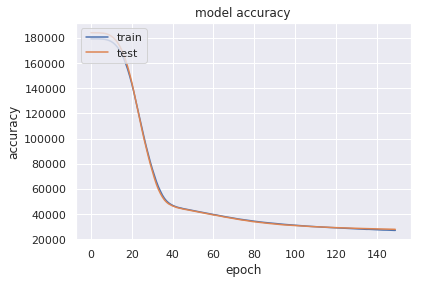

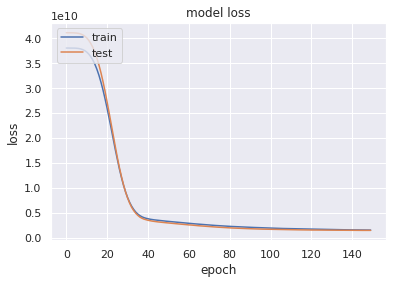

In [25]:
# zhrnutie historie presnosti
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# zhrnutie historie chýb
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
df_test = pd.read_csv('test.csv')
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']
id_col = df_test['Id'].values.tolist()
df_test['GrLivArea'] = np.log1p(df_test['GrLivArea'])
df_test = pd.get_dummies(df_test)
df_test = df_test.fillna(df_test.mean())
X_test = df_test[cols].values
# pred použitím NN vždy štandardna zmena údajov
scale = StandardScaler()
X_test = scale.fit_transform(X_test)

In [28]:
prediction = model.predict(X_test)

In [29]:
submission = pd.DataFrame()
submission['Id'] = id_col
submission['SalePrice'] = prediction

In [30]:
submission.to_csv('submission.csv', index=False)